In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
def load_cifar10():
    (x_train, _), (_, _) = cifar10.load_data()
    images = x_train.astype('float32') / 255.0
    return images


In [13]:
def add_gaussian_noise(images, noise_factor=0.05):
    noisy_images = np.clip(images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape), 0.0, 1.0)
    return noisy_images

In [14]:
def apply_pca(images, n_components=100):
    flattened_images = images.reshape((images.shape[0], -1))
    scaler = StandardScaler()
    scaled_images = scaler.fit_transform(flattened_images)

    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(scaled_images)

    # Compute the compression ratio
    compression_ratio = flattened_images.shape[1] / n_components
    print(f"Compression Ratio: {compression_ratio:.2f}")

    return reduced_images, pca, scaler

In [15]:
def inverse_pca(transformed_images, pca, scaler):
    images = load_cifar10()
    inverted_images = pca.inverse_transform(transformed_images)
    inverted_images = scaler.inverse_transform(inverted_images)
    inverted_images = inverted_images.reshape((-1,) + images.shape[1:])
    return np.clip(inverted_images, 0.0, 1.0)

In [16]:
def plot_images(images, title):
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

Compression Ratio: 30.72


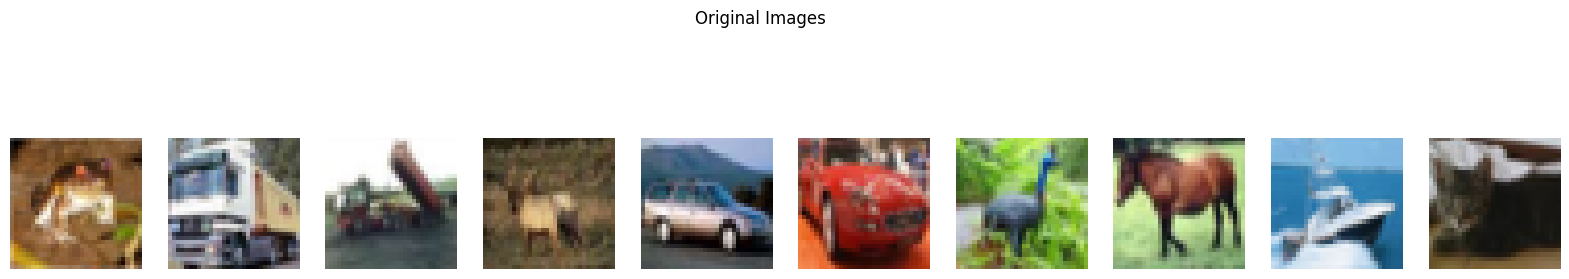

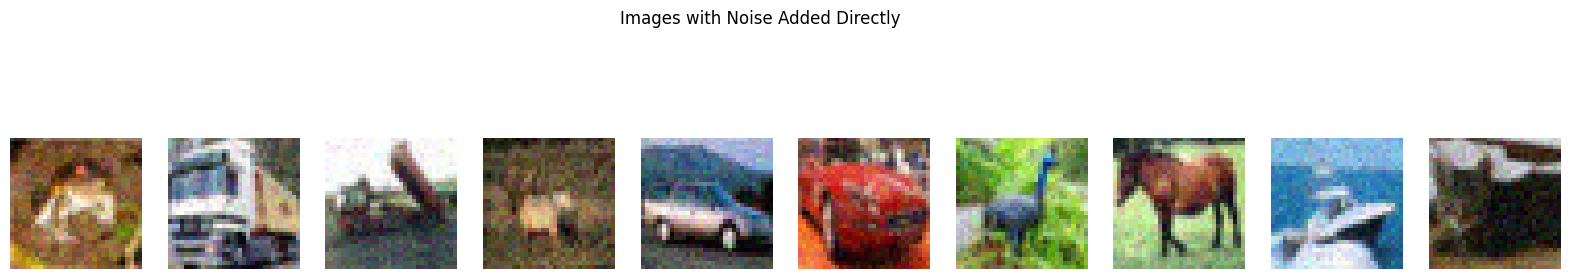

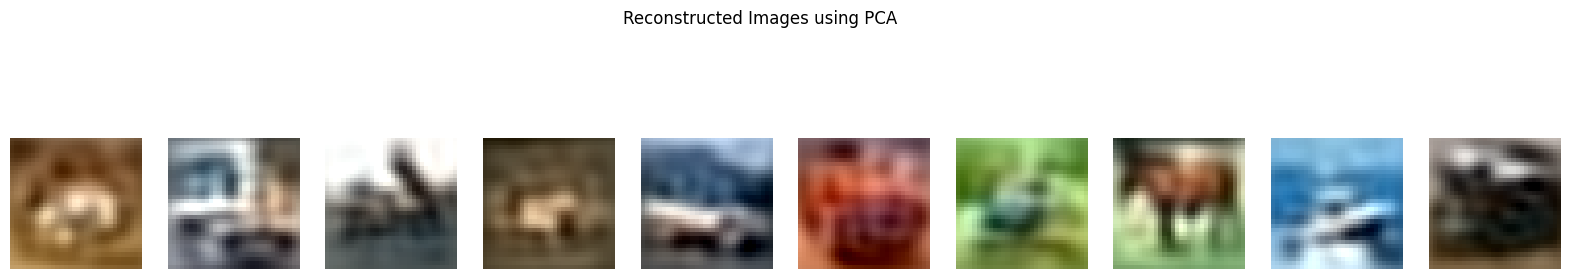

In [17]:
def main():
    images = load_cifar10()
    noisy_images_direct = add_gaussian_noise(images)

    reduced_images, pca, scaler = apply_pca(images)

    reconstructed_images = inverse_pca(reduced_images, pca, scaler)

    plot_images(images, 'Original Images')
    plot_images(noisy_images_direct, 'Images with Noise Added Directly')
    plot_images(reconstructed_images, 'Reconstructed Images using PCA')

if __name__ == "__main__":
    main()